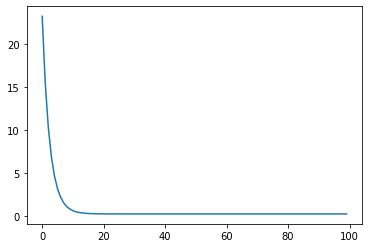

In [1]:
import torch

# A coefficient of 'True'
w_true = torch.Tensor([1, 2, 3])


# To prepare X Data, Add '1' to the initial Dimension of X
# to include intercepts in the Regression Coefficients.
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)

# Calculated by multiplying the 'True' Coefficients and
# the internalities of each 'X' by the Matrix and Vector.
y = torch.mv(X, w_true) + torch.randn(100) * 0.5
w = torch.randn(3, requires_grad=True)

# Learning Rate
gamma = 0.1

# Log of Loss-Function
losses = []

# Iterates 100 times
for epoch in range(100):
    # Initializing the Gradient Value calculated from the previous
    # Backward Method.
    w.grad = None
    
    # Calculate Prediction values named 'Y' by Linear Model.
    y_pred = torch.mv(X, w)
    
    # Calculation of Differentials by 'MSE_loss' and 'w'.
    loss = torch.mean((y - y_pred) ** 2)
    loss.backward()
    
    # Update the Gradient.
    # If the 'w'is replaced and renewed, it becomes a different Tensor and
    # the Calculation graph is ruined.
    # Therefore, only the Data is "updated".
    w.data = w.data - gamma * w.grad.data
    
    # Record the 'loss' for Convergence Verification.
    losses.append(loss.item())
    
    %matplotlib inline
    from matplotlib import pyplot as plt
    plt.plot(losses)